# **Movie Box Office Revenue Prediction**
*Linear regression model to predict the box office revenue of a movie.*

Team members:
<br> Nicolas Moscato-Barbeau 40210244
<br> Terryl-Errol Foryoung,
<br> Gulnoor Kaur,
<br> Sofia Valiante 40191897
<br> Daniel Pace, 40226833




# Set Up Testing

## Downloading Kaggle Data Set

In [ ]:
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"nicmos","key":"857320e65ccf101d55ee7faec81c2295"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library

In [ ]:
!kaggle datasets download asaniczka/tmdb-movies-dataset-2023-930k-movies -p /content/kaggle/

Dataset URL: https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies
License(s): ODC Attribution License (ODC-By)
 98% 201M/204M [00:03<00:00, 73.9MB/s]
100% 204M/204M [00:03<00:00, 61.7MB/s]


### Combine Datasets, reform, correction techniques

In [ ]:
movies_path_zip = '/content/kaggle/tmdb-movies-dataset-2023-930k-movies.zip'
!unzip $movies_path_zip
movies_path = '/content/TMDB_movie_dataset_v11.csv'

Archive:  /content/kaggle/tmdb-movies-dataset-2023-930k-movies.zip
  inflating: TMDB_movie_dataset_v11.csv  


## Exploring DataSet

In [ ]:
#@title Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(movies_path)
columns = df.columns
print(columns)

NameError: name 'movies_path' is not defined

Text(0, 0.5, 'revenue')

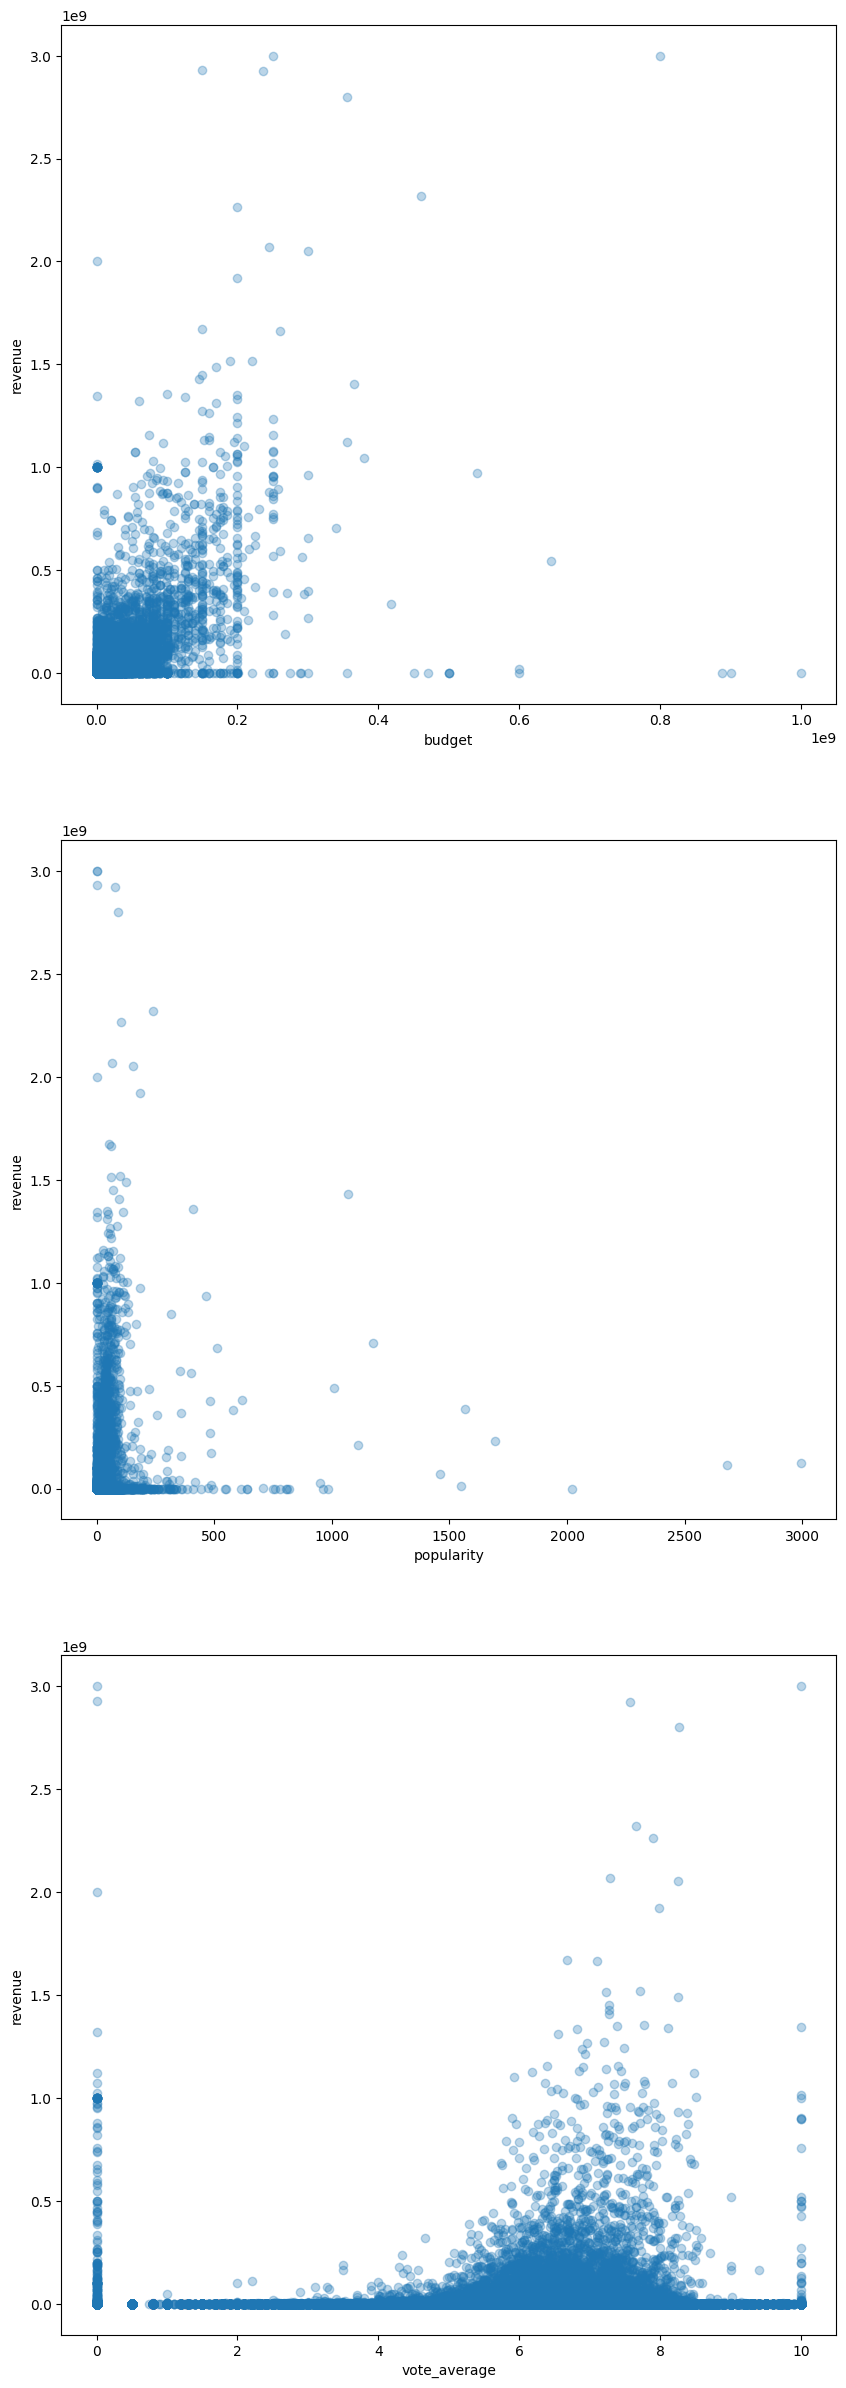

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(10, 30))
ax[0].scatter(df['budget'], df['revenue'], alpha=0.3)
ax[0].set_xlabel('budget')
ax[0].set_ylabel('revenue')
ax[1].scatter(df['popularity'], df['revenue'], alpha=0.3)
ax[1].set_xlabel('popularity')
ax[1].set_ylabel('revenue')
ax[2].scatter(df['vote_average'], df['revenue'], alpha=0.3)
ax[2].set_xlabel('vote_average')
ax[2].set_ylabel('revenue')

## Data Preparation (Check out the Jupyter Notebook file in Discord)
1. Standardize formats of release date ✓ ***(completed at data integration)***
2. Runtime from hours to minutes ✓ ***(completed at data integration)***
3. Label genres ✓

4. Remove revenue of 0$ and null values ✓

5. Remove budget of 0$ and null ✓

6. Adjust budget and revenue for inflation ✓

7. Remove null values for directors ✓

8. Remove runtimes less than 60 minutes ✓

9. Remove null distributors ✓

10. Remove null MPAAs ✓

In [ ]:
!pip install cpi==1.0.0 # used to adjust for inflation
from sklearn.preprocessing import LabelEncoder
from scipy import stats

import pandas as pd
import numpy as np
import cpi
cpi.update()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 44.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cpi/__init__.py:46: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


### Read .csv as pandas dataframe

In [ ]:
merged_df = pd.read_csv("mergedV2.csv")
print("year", merged_df['year'].isnull().sum())
print("budget", merged_df['budget'].isnull().sum())
print("revenue", merged_df['revenue'].isnull().sum())
print("director", merged_df['director'].isnull().sum())
print("distributor", merged_df['distributor'].isnull().sum())
print("mpaa", merged_df['mpaa'].isnull().sum())
merged_df

year 108
budget 492
revenue 891
director 226
distributor 5260
mpaa 3464


title    year mpaa release_date  \
0                    Tarnation  2003.0  NaN       06-Oct   
1            My Date with Drew  2004.0   PG       05-Aug   
2       Midget Zombie Takeover  2013.0  NaN       08-Feb   
3                The Reception  2005.0  NaN       15-Jul   
4                    Following  1998.0    R       02-Apr   
...                        ...     ...  ...          ...   
11281                  Chasers  1994.0  NaN   1994-04-22   
11282         We Are the Best!  2013.0  NaN   2013-03-28   
11283  The Long Kiss Goodnight  1996.0  NaN   1996-10-11   
11284         Along Came Polly  2004.0  NaN   2004-01-16   
11285                Abduction  2011.0  NaN   2011-09-22   

                      distributor           director       main_actor_1  \
0                Wellspring Media  Jonathan Caouette  Jonathan Caouette   
1       Slowhand Cinema Releasing           Jon Gunn   Brian Herzlinger   
2      Driving With Our Eyes Shut    Glenn Berggoetz       Kristi McKay   
3                Strand Releasing      John G. Young     Maggie Burkwit   
4                 Zeitgeist Films  Christopher Nolan    Jeremy Theobald   
...                           ...                ...                ...   
11281                Warner Bros.      Dennis Hopper       Tom Berenger   
11282                 Memfis Film    Lukas Moodysson    Mira Barkhammar   
11283             New Line Cinema       Renny Harlin        Geena Davis   
11284                Jersey Films       John Hamburg        Ben Stiller   
11285            Lions Gate Films     John Singleton                NaN   

                 main_actor_2               main_actor_3  \
0               Renee Leblanc               Adolph Davis   
1              Drew Barrymore                John August   
2      Matt 'Goose' Goosherst           Kedryn Carpenter   
3             Chris Burmester         Darien Sills-Evans   
4                    Alex Haw               Lucy Russell   
...                       ...                        ...   
11281        William McNamara  –≠—Ä–∏–∫–∞ –≠–ª–µ–Ω–∏–∞–∫   
11282             Mira Grosin                Liv LeMoyne   
11283       Samuel L. Jackson                Yvonne Zima   
11284        Jennifer Aniston     Philip Seymour Hoffman   
11285                     NaN                        NaN   

                      main_actor_4      budget      revenue      genre_1  \
0                   Rosemary Davis       220.0     638521.0    Biography   
1      Stephanie Bedell Quartararo      1100.0     262770.0  Documentary   
2                 Daniel G. Cramer      2000.0      11006.0       Comedy   
3                Wayne Lamont Sims      5000.0      18389.0       Comedy   
4                       John Nolan      6000.0      48482.0        Crime   
...                            ...         ...          ...          ...   
11281               Crispin Glover         0.0    1596687.0       Comedy   
11282                 David Dencik         0.0     180590.0        Drama   
11283                 Craig Bierko  65000000.0   89456761.0        Crime   
11284                Debra Messing  42000000.0  171963386.0       Comedy   
11285                          NaN  35000000.0   82087155.0     Thriller   

           genre_2   genre_3  runtime  
0      Documentary       NaN     88.0  
1              NaN       NaN     90.0  
2           Horror       NaN     73.0  
3            Drama   Romance     80.0  
4          Mystery  Thriller     69.0  
...            ...       ...      ...  
11281      Romance       NaN    102.0  
11282        Music       NaN    102.0  
11283       Action   Mystery    120.0  
11284      Romance       NaN     90.0  
11285       Action   Mystery    106.0  

[11286 rows x 16 columns]

In [ ]:
import re
# drop rows with NaN
merged_df.dropna(subset=['release_date'])

# Mapping of month numbers to three-letter abbreviations
month_map = {
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}
# Regex pattern for YYYY-MM-DD
date_pattern = re.compile(r'^\d{4}-(0[1-9]|1[0-2])-(0[1-9]|[12][0-9]|3[01])$')

# Function to transform the date format
def transform_date(date_str):
    date_str = str(date_str)
    if date_pattern.match(date_str):
        year, month, day = date_str.split('-')
        return f"{day}-{month_map[month]}"
    else:
        return date_str  # or handle invalid formats as needed

# Apply the transformation to the 'release_date' column
merged_df['release_date'] = merged_df['release_date'].apply(transform_date)
merged_df

title    year mpaa release_date  \
0                    Tarnation  2003.0  NaN       06-Oct   
1            My Date with Drew  2004.0   PG       05-Aug   
2       Midget Zombie Takeover  2013.0  NaN       08-Feb   
3                The Reception  2005.0  NaN       15-Jul   
4                    Following  1998.0    R       02-Apr   
...                        ...     ...  ...          ...   
11281                  Chasers  1994.0  NaN       22-Apr   
11282         We Are the Best!  2013.0  NaN       28-Mar   
11283  The Long Kiss Goodnight  1996.0  NaN       11-Oct   
11284         Along Came Polly  2004.0  NaN       16-Jan   
11285                Abduction  2011.0  NaN       22-Sep   

                      distributor           director       main_actor_1  \
0                Wellspring Media  Jonathan Caouette  Jonathan Caouette   
1       Slowhand Cinema Releasing           Jon Gunn   Brian Herzlinger   
2      Driving With Our Eyes Shut    Glenn Berggoetz       Kristi McKay   
3                Strand Releasing      John G. Young     Maggie Burkwit   
4                 Zeitgeist Films  Christopher Nolan    Jeremy Theobald   
...                           ...                ...                ...   
11281                Warner Bros.      Dennis Hopper       Tom Berenger   
11282                 Memfis Film    Lukas Moodysson    Mira Barkhammar   
11283             New Line Cinema       Renny Harlin        Geena Davis   
11284                Jersey Films       John Hamburg        Ben Stiller   
11285            Lions Gate Films     John Singleton                NaN   

                 main_actor_2               main_actor_3  \
0               Renee Leblanc               Adolph Davis   
1              Drew Barrymore                John August   
2      Matt 'Goose' Goosherst           Kedryn Carpenter   
3             Chris Burmester         Darien Sills-Evans   
4                    Alex Haw               Lucy Russell   
...                       ...                        ...   
11281        William McNamara  –≠—Ä–∏–∫–∞ –≠–ª–µ–Ω–∏–∞–∫   
11282             Mira Grosin                Liv LeMoyne   
11283       Samuel L. Jackson                Yvonne Zima   
11284        Jennifer Aniston     Philip Seymour Hoffman   
11285                     NaN                        NaN   

                      main_actor_4      budget      revenue      genre_1  \
0                   Rosemary Davis       220.0     638521.0    Biography   
1      Stephanie Bedell Quartararo      1100.0     262770.0  Documentary   
2                 Daniel G. Cramer      2000.0      11006.0       Comedy   
3                Wayne Lamont Sims      5000.0      18389.0       Comedy   
4                       John Nolan      6000.0      48482.0        Crime   
...                            ...         ...          ...          ...   
11281               Crispin Glover         0.0    1596687.0       Comedy   
11282                 David Dencik         0.0     180590.0        Drama   
11283                 Craig Bierko  65000000.0   89456761.0        Crime   
11284                Debra Messing  42000000.0  171963386.0       Comedy   
11285                          NaN  35000000.0   82087155.0     Thriller   

           genre_2   genre_3  runtime  
0      Documentary       NaN     88.0  
1              NaN       NaN     90.0  
2           Horror       NaN     73.0  
3            Drama   Romance     80.0  
4          Mystery  Thriller     69.0  
...            ...       ...      ...  
11281      Romance       NaN    102.0  
11282        Music       NaN    102.0  
11283       Action   Mystery    120.0  
11284      Romance       NaN     90.0  
11285       Action   Mystery    106.0  

[11286 rows x 16 columns]

In [ ]:
from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='revenue', y='genre_1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_6' is not defined

In [ ]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='budget', y='revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name '_df_5' is not defined

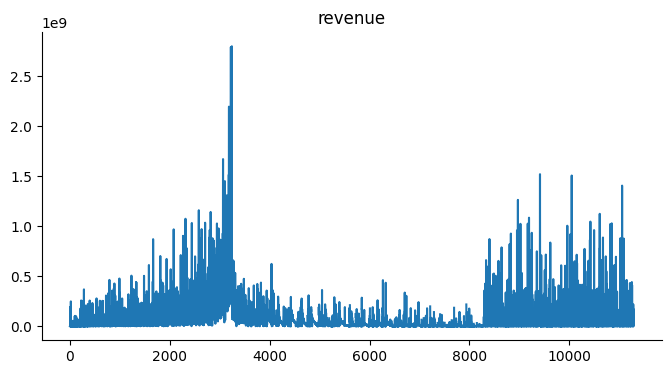

In [ ]:
from matplotlib import pyplot as plt
_df_14['revenue'].plot(kind='line', figsize=(8, 4), title='revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

### 3. Label Genres

In [ ]:
merged_df.dropna(subset=['genre_1']) # drop rows with NaN
merged_df['genre_2'].fillna(merged_df['genre_1'], inplace=True) #replace missing genres with first genre
merged_df['genre_3'].fillna(merged_df['genre_1'], inplace=True)

#from sklearn.preprocessing import LabelEncoder
categ = ['genre_1', 'genre_2', 'genre_3']
le = LabelEncoder() #label encode each genre with a unique label
merged_df[categ] = merged_df[categ].apply(le.fit_transform)
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

<ipython-input-6-38c1c962496b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['genre_2'].fillna(merged_df['genre_1'], inplace=True) #replace missing genres with first genre
<ipython-input-6-38c1c962496b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

title    year mpaa release_date  \
0                    Tarnation  2003.0  NaN       06-Oct   
1            My Date with Drew  2004.0   PG       05-Aug   
2       Midget Zombie Takeover  2013.0  NaN       08-Feb   
3                The Reception  2005.0  NaN       15-Jul   
4                    Following  1998.0    R       02-Apr   
...                        ...     ...  ...          ...   
11281                  Chasers  1994.0  NaN       22-Apr   
11282         We Are the Best!  2013.0  NaN       28-Mar   
11283  The Long Kiss Goodnight  1996.0  NaN       11-Oct   
11284         Along Came Polly  2004.0  NaN       16-Jan   
11285                Abduction  2011.0  NaN       22-Sep   

                      distributor           director       main_actor_1  \
0                Wellspring Media  Jonathan Caouette  Jonathan Caouette   
1       Slowhand Cinema Releasing           Jon Gunn   Brian Herzlinger   
2      Driving With Our Eyes Shut    Glenn Berggoetz       Kristi McKay   
3                Strand Releasing      John G. Young     Maggie Burkwit   
4                 Zeitgeist Films  Christopher Nolan    Jeremy Theobald   
...                           ...                ...                ...   
11281                Warner Bros.      Dennis Hopper       Tom Berenger   
11282                 Memfis Film    Lukas Moodysson    Mira Barkhammar   
11283             New Line Cinema       Renny Harlin        Geena Davis   
11284                Jersey Films       John Hamburg        Ben Stiller   
11285            Lions Gate Films     John Singleton                NaN   

                 main_actor_2               main_actor_3  \
0               Renee Leblanc               Adolph Davis   
1              Drew Barrymore                John August   
2      Matt 'Goose' Goosherst           Kedryn Carpenter   
3             Chris Burmester         Darien Sills-Evans   
4                    Alex Haw               Lucy Russell   
...                       ...                        ...   
11281        William McNamara  –≠—Ä–∏–∫–∞ –≠–ª–µ–Ω–∏–∞–∫   
11282             Mira Grosin                Liv LeMoyne   
11283       Samuel L. Jackson                Yvonne Zima   
11284        Jennifer Aniston     Philip Seymour Hoffman   
11285                     NaN                        NaN   

                      main_actor_4      budget      revenue  genre_1  genre_2  \
0                   Rosemary Davis       220.0     638521.0        3        6   
1      Stephanie Bedell Quartararo      1100.0     262770.0        6        6   
2                 Daniel G. Cramer      2000.0      11006.0        4       13   
3                Wayne Lamont Sims      5000.0      18389.0        4        7   
4                       John Nolan      6000.0      48482.0        5       16   
...                            ...         ...          ...      ...      ...   
11281               Crispin Glover         0.0    1596687.0        4       19   
11282                 David Dencik         0.0     180590.0        7       14   
11283                 Craig Bierko  65000000.0   89456761.0        5        0   
11284                Debra Messing  42000000.0  171963386.0        4       19   
11285                          NaN  35000000.0   82087155.0       22        0   

       genre_3  runtime  
0            3     88.0  
1            6     90.0  
2            4     73.0  
3           19     80.0  
4           24     69.0  
...        ...      ...  
11281        4    102.0  
11282        7    102.0  
11283       16    120.0  
11284        4     90.0  
11285       16    106.0  

[11286 rows x 16 columns]

### 4. Remove revenue that is 0$ or null values

In [ ]:
merged_df = merged_df.dropna(subset=['revenue']) # drop rows with NaN
merged_df = merged_df[merged_df['revenue'] > 0]
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

title    year mpaa release_date  \
0                    Tarnation  2003.0  NaN       06-Oct   
1            My Date with Drew  2004.0   PG       05-Aug   
2       Midget Zombie Takeover  2013.0  NaN       08-Feb   
3                The Reception  2005.0  NaN       15-Jul   
4                    Following  1998.0    R       02-Apr   
...                        ...     ...  ...          ...   
11281                  Chasers  1994.0  NaN       22-Apr   
11282         We Are the Best!  2013.0  NaN       28-Mar   
11283  The Long Kiss Goodnight  1996.0  NaN       11-Oct   
11284         Along Came Polly  2004.0  NaN       16-Jan   
11285                Abduction  2011.0  NaN       22-Sep   

                      distributor           director       main_actor_1  \
0                Wellspring Media  Jonathan Caouette  Jonathan Caouette   
1       Slowhand Cinema Releasing           Jon Gunn   Brian Herzlinger   
2      Driving With Our Eyes Shut    Glenn Berggoetz       Kristi McKay   
3                Strand Releasing      John G. Young     Maggie Burkwit   
4                 Zeitgeist Films  Christopher Nolan    Jeremy Theobald   
...                           ...                ...                ...   
11281                Warner Bros.      Dennis Hopper       Tom Berenger   
11282                 Memfis Film    Lukas Moodysson    Mira Barkhammar   
11283             New Line Cinema       Renny Harlin        Geena Davis   
11284                Jersey Films       John Hamburg        Ben Stiller   
11285            Lions Gate Films     John Singleton                NaN   

                 main_actor_2               main_actor_3  \
0               Renee Leblanc               Adolph Davis   
1              Drew Barrymore                John August   
2      Matt 'Goose' Goosherst           Kedryn Carpenter   
3             Chris Burmester         Darien Sills-Evans   
4                    Alex Haw               Lucy Russell   
...                       ...                        ...   
11281        William McNamara  –≠—Ä–∏–∫–∞ –≠–ª–µ–Ω–∏–∞–∫   
11282             Mira Grosin                Liv LeMoyne   
11283       Samuel L. Jackson                Yvonne Zima   
11284        Jennifer Aniston     Philip Seymour Hoffman   
11285                     NaN                        NaN   

                      main_actor_4      budget      revenue  genre_1  genre_2  \
0                   Rosemary Davis       220.0     638521.0        3        6   
1      Stephanie Bedell Quartararo      1100.0     262770.0        6        6   
2                 Daniel G. Cramer      2000.0      11006.0        4       13   
3                Wayne Lamont Sims      5000.0      18389.0        4        7   
4                       John Nolan      6000.0      48482.0        5       16   
...                            ...         ...          ...      ...      ...   
11281               Crispin Glover         0.0    1596687.0        4       19   
11282                 David Dencik         0.0     180590.0        7       14   
11283                 Craig Bierko  65000000.0   89456761.0        5        0   
11284                Debra Messing  42000000.0  171963386.0        4       19   
11285                          NaN  35000000.0   82087155.0       22        0   

       genre_3  runtime  
0            3     88.0  
1            6     90.0  
2            4     73.0  
3           19     80.0  
4           24     69.0  
...        ...      ...  
11281        4    102.0  
11282        7    102.0  
11283       16    120.0  
11284        4     90.0  
11285       16    106.0  

[10395 rows x 16 columns]

### 5. Remove budget of 0$ and null



In [ ]:
merged_df = merged_df[merged_df['budget'] > 0]
merged_df = merged_df.dropna(subset=['budget'])
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

title    year mpaa release_date  \
0                    Tarnation  2003.0  NaN       06-Oct   
1            My Date with Drew  2004.0   PG       05-Aug   
2       Midget Zombie Takeover  2013.0  NaN       08-Feb   
3                The Reception  2005.0  NaN       15-Jul   
4                    Following  1998.0    R       02-Apr   
...                        ...     ...  ...          ...   
11278      The Thief of Bagdad  1924.0  NaN       18-Mar   
11279             The Terminal  2004.0  NaN       17-Jun   
11283  The Long Kiss Goodnight  1996.0  NaN       11-Oct   
11284         Along Came Polly  2004.0  NaN       16-Jan   
11285                Abduction  2011.0  NaN       22-Sep   

                      distributor           director       main_actor_1  \
0                Wellspring Media  Jonathan Caouette  Jonathan Caouette   
1       Slowhand Cinema Releasing           Jon Gunn   Brian Herzlinger   
2      Driving With Our Eyes Shut    Glenn Berggoetz       Kristi McKay   
3                Strand Releasing      John G. Young     Maggie Burkwit   
4                 Zeitgeist Films  Christopher Nolan    Jeremy Theobald   
...                           ...                ...                ...   
11278  Douglas Fairbanks Pictures                NaN                NaN   
11279              DreamWorks SKG   Steven Spielberg          Tom Hanks   
11283             New Line Cinema       Renny Harlin        Geena Davis   
11284                Jersey Films       John Hamburg        Ben Stiller   
11285            Lions Gate Films     John Singleton                NaN   

                 main_actor_2            main_actor_3  \
0               Renee Leblanc            Adolph Davis   
1              Drew Barrymore             John August   
2      Matt 'Goose' Goosherst        Kedryn Carpenter   
3             Chris Burmester      Darien Sills-Evans   
4                    Alex Haw            Lucy Russell   
...                       ...                     ...   
11278                     NaN                     NaN   
11279    Catherine Zeta-Jones           Stanley Tucci   
11283       Samuel L. Jackson             Yvonne Zima   
11284        Jennifer Aniston  Philip Seymour Hoffman   
11285                     NaN                     NaN   

                      main_actor_4      budget      revenue  genre_1  genre_2  \
0                   Rosemary Davis       220.0     638521.0        3        6   
1      Stephanie Bedell Quartararo      1100.0     262770.0        6        6   
2                 Daniel G. Cramer      2000.0      11006.0        4       13   
3                Wayne Lamont Sims      5000.0      18389.0        4        7   
4                       John Nolan      6000.0      48482.0        5       16   
...                            ...         ...          ...      ...      ...   
11278                          NaN   1135654.0    1213880.0        0        1   
11279                  Chi McBride  60000000.0  219417255.0        4        7   
11283                 Craig Bierko  65000000.0   89456761.0        5        0   
11284                Debra Messing  42000000.0  171963386.0        4       19   
11285                          NaN  35000000.0   82087155.0       22        0   

       genre_3  runtime  
0            3     88.0  
1            6     90.0  
2            4     73.0  
3           19     80.0  
4           24     69.0  
...        ...      ...  
11278        7    149.0  
11279        4    128.0  
11283       16    120.0  
11284        4     90.0  
11285       16    106.0  

[9315 rows x 16 columns]

### 6. Adjust budget and revenue for inflation

In [ ]:
merged_df = merged_df.dropna(subset=['year']) # drop rows with NaN
merged_df['budget'] = merged_df.apply(lambda row: cpi.inflate(row['budget'], int(row['year'])), axis=1) #update the budget column to account for inflation
merged_df['revenue'] = merged_df.apply(lambda row: cpi.inflate(row['revenue'], int(row['year'])), axis=1) #update the revenue column to account for inflation
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

title    year mpaa release_date  \
0                    Tarnation  2003.0  NaN       06-Oct   
1            My Date with Drew  2004.0   PG       05-Aug   
2       Midget Zombie Takeover  2013.0  NaN       08-Feb   
3                The Reception  2005.0  NaN       15-Jul   
4                    Following  1998.0    R       02-Apr   
...                        ...     ...  ...          ...   
11278      The Thief of Bagdad  1924.0  NaN       18-Mar   
11279             The Terminal  2004.0  NaN       17-Jun   
11283  The Long Kiss Goodnight  1996.0  NaN       11-Oct   
11284         Along Came Polly  2004.0  NaN       16-Jan   
11285                Abduction  2011.0  NaN       22-Sep   

                      distributor           director       main_actor_1  \
0                Wellspring Media  Jonathan Caouette  Jonathan Caouette   
1       Slowhand Cinema Releasing           Jon Gunn   Brian Herzlinger   
2      Driving With Our Eyes Shut    Glenn Berggoetz       Kristi McKay   
3                Strand Releasing      John G. Young     Maggie Burkwit   
4                 Zeitgeist Films  Christopher Nolan    Jeremy Theobald   
...                           ...                ...                ...   
11278  Douglas Fairbanks Pictures                NaN                NaN   
11279              DreamWorks SKG   Steven Spielberg          Tom Hanks   
11283             New Line Cinema       Renny Harlin        Geena Davis   
11284                Jersey Films       John Hamburg        Ben Stiller   
11285            Lions Gate Films     John Singleton                NaN   

                 main_actor_2            main_actor_3  \
0               Renee Leblanc            Adolph Davis   
1              Drew Barrymore             John August   
2      Matt 'Goose' Goosherst        Kedryn Carpenter   
3             Chris Burmester      Darien Sills-Evans   
4                    Alex Haw            Lucy Russell   
...                       ...                     ...   
11278                     NaN                     NaN   
11279    Catherine Zeta-Jones           Stanley Tucci   
11283       Samuel L. Jackson             Yvonne Zima   
11284        Jennifer Aniston  Philip Seymour Hoffman   
11285                     NaN                     NaN   

                      main_actor_4        budget       revenue  genre_1  \
0                   Rosemary Davis  3.239859e+02  9.403263e+05        3   
1      Stephanie Bedell Quartararo  1.577909e+03  3.769338e+05        6   
2                 Daniel G. Cramer  2.326352e+03  1.280192e+04        4   
3                Wayne Lamont Sims  6.937276e+03  2.551391e+04        4   
4                       John Nolan  9.974356e+03  8.059612e+04        5   
...                            ...           ...           ...      ...   
11278                          NaN  1.799580e+07  1.923538e+07        0   
11279                  Chi McBride  8.606776e+07  3.147459e+08        4   
11283                 Craig Bierko  1.122565e+08  1.544939e+08        5   
11284                Debra Messing  6.024743e+07  2.466751e+08        4   
11285                          NaN  4.216232e+07  9.888528e+07       22   

       genre_2  genre_3  runtime  
0            6        3     88.0  
1            6        6     90.0  
2           13        4     73.0  
3            7       19     80.0  
4           16       24     69.0  
...        ...      ...      ...  
11278        1        7    149.0  
11279        7        4    128.0  
11283        0       16    120.0  
11284       19        4     90.0  
11285        0       16    106.0  

[9315 rows x 16 columns]

### 7. Remove null values for directors

In [ ]:
merged_df = merged_df.dropna(subset=['director'])
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

title    year mpaa release_date  \
0                    Tarnation  2003.0  NaN       06-Oct   
1            My Date with Drew  2004.0   PG       05-Aug   
2       Midget Zombie Takeover  2013.0  NaN       08-Feb   
3                The Reception  2005.0  NaN       15-Jul   
4                    Following  1998.0    R       02-Apr   
...                        ...     ...  ...          ...   
11277      Save the Last Dance  2001.0  NaN       01-Dec   
11279             The Terminal  2004.0  NaN       17-Jun   
11283  The Long Kiss Goodnight  1996.0  NaN       11-Oct   
11284         Along Came Polly  2004.0  NaN       16-Jan   
11285                Abduction  2011.0  NaN       22-Sep   

                      distributor           director       main_actor_1  \
0                Wellspring Media  Jonathan Caouette  Jonathan Caouette   
1       Slowhand Cinema Releasing           Jon Gunn   Brian Herzlinger   
2      Driving With Our Eyes Shut    Glenn Berggoetz       Kristi McKay   
3                Strand Releasing      John G. Young     Maggie Burkwit   
4                 Zeitgeist Films  Christopher Nolan    Jeremy Theobald   
...                           ...                ...                ...   
11277                   MTV Films      Thomas Carter       Julia Stiles   
11279              DreamWorks SKG   Steven Spielberg          Tom Hanks   
11283             New Line Cinema       Renny Harlin        Geena Davis   
11284                Jersey Films       John Hamburg        Ben Stiller   
11285            Lions Gate Films     John Singleton                NaN   

                 main_actor_2            main_actor_3  \
0               Renee Leblanc            Adolph Davis   
1              Drew Barrymore             John August   
2      Matt 'Goose' Goosherst        Kedryn Carpenter   
3             Chris Burmester      Darien Sills-Evans   
4                    Alex Haw            Lucy Russell   
...                       ...                     ...   
11277     Sean Patrick Thomas        Kerry Washington   
11279    Catherine Zeta-Jones           Stanley Tucci   
11283       Samuel L. Jackson             Yvonne Zima   
11284        Jennifer Aniston  Philip Seymour Hoffman   
11285                     NaN                     NaN   

                      main_actor_4        budget       revenue  genre_1  \
0                   Rosemary Davis  3.239859e+02  9.403263e+05        3   
1      Stephanie Bedell Quartararo  1.577909e+03  3.769338e+05        6   
2                 Daniel G. Cramer  2.326352e+03  1.280192e+04        4   
3                Wayne Lamont Sims  6.937276e+03  2.551391e+04        4   
4                       John Nolan  9.974356e+03  8.059612e+04        5   
...                            ...           ...           ...      ...   
11277                 Fredro Starr  1.989051e+07  1.392922e+08        7   
11279                  Chi McBride  8.606776e+07  3.147459e+08        4   
11283                 Craig Bierko  1.122565e+08  1.544939e+08        5   
11284                Debra Messing  6.024743e+07  2.466751e+08        4   
11285                          NaN  4.216232e+07  9.888528e+07       22   

       genre_2  genre_3  runtime  
0            6        3     88.0  
1            6        6     90.0  
2           13        4     73.0  
3            7       19     80.0  
4           16       24     69.0  
...        ...      ...      ...  
11277        8       19    112.0  
11279        7        4    128.0  
11283        0       16    120.0  
11284       19        4     90.0  
11285        0       16    106.0  

[9203 rows x 16 columns]

### 8. Remove runtimes under 60 minutes

In [ ]:
merged_df = merged_df[merged_df['runtime'] >= 60] # drop rows with runtime less than 60 minutes and 0 min runtimes
merged_df = merged_df.dropna(subset=['runtime']) # drop rows with NaN
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

title    year mpaa release_date  \
0                    Tarnation  2003.0  NaN       06-Oct   
1            My Date with Drew  2004.0   PG       05-Aug   
2       Midget Zombie Takeover  2013.0  NaN       08-Feb   
3                The Reception  2005.0  NaN       15-Jul   
4                    Following  1998.0    R       02-Apr   
...                        ...     ...  ...          ...   
11277      Save the Last Dance  2001.0  NaN       01-Dec   
11279             The Terminal  2004.0  NaN       17-Jun   
11283  The Long Kiss Goodnight  1996.0  NaN       11-Oct   
11284         Along Came Polly  2004.0  NaN       16-Jan   
11285                Abduction  2011.0  NaN       22-Sep   

                      distributor           director       main_actor_1  \
0                Wellspring Media  Jonathan Caouette  Jonathan Caouette   
1       Slowhand Cinema Releasing           Jon Gunn   Brian Herzlinger   
2      Driving With Our Eyes Shut    Glenn Berggoetz       Kristi McKay   
3                Strand Releasing      John G. Young     Maggie Burkwit   
4                 Zeitgeist Films  Christopher Nolan    Jeremy Theobald   
...                           ...                ...                ...   
11277                   MTV Films      Thomas Carter       Julia Stiles   
11279              DreamWorks SKG   Steven Spielberg          Tom Hanks   
11283             New Line Cinema       Renny Harlin        Geena Davis   
11284                Jersey Films       John Hamburg        Ben Stiller   
11285            Lions Gate Films     John Singleton                NaN   

                 main_actor_2            main_actor_3  \
0               Renee Leblanc            Adolph Davis   
1              Drew Barrymore             John August   
2      Matt 'Goose' Goosherst        Kedryn Carpenter   
3             Chris Burmester      Darien Sills-Evans   
4                    Alex Haw            Lucy Russell   
...                       ...                     ...   
11277     Sean Patrick Thomas        Kerry Washington   
11279    Catherine Zeta-Jones           Stanley Tucci   
11283       Samuel L. Jackson             Yvonne Zima   
11284        Jennifer Aniston  Philip Seymour Hoffman   
11285                     NaN                     NaN   

                      main_actor_4        budget       revenue  genre_1  \
0                   Rosemary Davis  3.239859e+02  9.403263e+05        3   
1      Stephanie Bedell Quartararo  1.577909e+03  3.769338e+05        6   
2                 Daniel G. Cramer  2.326352e+03  1.280192e+04        4   
3                Wayne Lamont Sims  6.937276e+03  2.551391e+04        4   
4                       John Nolan  9.974356e+03  8.059612e+04        5   
...                            ...           ...           ...      ...   
11277                 Fredro Starr  1.989051e+07  1.392922e+08        7   
11279                  Chi McBride  8.606776e+07  3.147459e+08        4   
11283                 Craig Bierko  1.122565e+08  1.544939e+08        5   
11284                Debra Messing  6.024743e+07  2.466751e+08        4   
11285                          NaN  4.216232e+07  9.888528e+07       22   

       genre_2  genre_3  runtime  
0            6        3     88.0  
1            6        6     90.0  
2           13        4     73.0  
3            7       19     80.0  
4           16       24     69.0  
...        ...      ...      ...  
11277        8       19    112.0  
11279        7        4    128.0  
11283        0       16    120.0  
11284       19        4     90.0  
11285        0       16    106.0  

[9189 rows x 16 columns]

### 9. Remove null distributors

In [ ]:
merged_df = merged_df.dropna(subset=['distributor'])
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

title    year mpaa release_date  \
0                    Tarnation  2003.0  NaN       06-Oct   
1            My Date with Drew  2004.0   PG       05-Aug   
2       Midget Zombie Takeover  2013.0  NaN       08-Feb   
3                The Reception  2005.0  NaN       15-Jul   
4                    Following  1998.0    R       02-Apr   
...                        ...     ...  ...          ...   
11277      Save the Last Dance  2001.0  NaN       01-Dec   
11279             The Terminal  2004.0  NaN       17-Jun   
11283  The Long Kiss Goodnight  1996.0  NaN       11-Oct   
11284         Along Came Polly  2004.0  NaN       16-Jan   
11285                Abduction  2011.0  NaN       22-Sep   

                      distributor           director       main_actor_1  \
0                Wellspring Media  Jonathan Caouette  Jonathan Caouette   
1       Slowhand Cinema Releasing           Jon Gunn   Brian Herzlinger   
2      Driving With Our Eyes Shut    Glenn Berggoetz       Kristi McKay   
3                Strand Releasing      John G. Young     Maggie Burkwit   
4                 Zeitgeist Films  Christopher Nolan    Jeremy Theobald   
...                           ...                ...                ...   
11277                   MTV Films      Thomas Carter       Julia Stiles   
11279              DreamWorks SKG   Steven Spielberg          Tom Hanks   
11283             New Line Cinema       Renny Harlin        Geena Davis   
11284                Jersey Films       John Hamburg        Ben Stiller   
11285            Lions Gate Films     John Singleton                NaN   

                 main_actor_2            main_actor_3  \
0               Renee Leblanc            Adolph Davis   
1              Drew Barrymore             John August   
2      Matt 'Goose' Goosherst        Kedryn Carpenter   
3             Chris Burmester      Darien Sills-Evans   
4                    Alex Haw            Lucy Russell   
...                       ...                     ...   
11277     Sean Patrick Thomas        Kerry Washington   
11279    Catherine Zeta-Jones           Stanley Tucci   
11283       Samuel L. Jackson             Yvonne Zima   
11284        Jennifer Aniston  Philip Seymour Hoffman   
11285                     NaN                     NaN   

                      main_actor_4        budget       revenue  genre_1  \
0                   Rosemary Davis  3.239859e+02  9.403263e+05        3   
1      Stephanie Bedell Quartararo  1.577909e+03  3.769338e+05        6   
2                 Daniel G. Cramer  2.326352e+03  1.280192e+04        4   
3                Wayne Lamont Sims  6.937276e+03  2.551391e+04        4   
4                       John Nolan  9.974356e+03  8.059612e+04        5   
...                            ...           ...           ...      ...   
11277                 Fredro Starr  1.989051e+07  1.392922e+08        7   
11279                  Chi McBride  8.606776e+07  3.147459e+08        4   
11283                 Craig Bierko  1.122565e+08  1.544939e+08        5   
11284                Debra Messing  6.024743e+07  2.466751e+08        4   
11285                          NaN  4.216232e+07  9.888528e+07       22   

       genre_2  genre_3  runtime  
0            6        3     88.0  
1            6        6     90.0  
2           13        4     73.0  
3            7       19     80.0  
4           16       24     69.0  
...        ...      ...      ...  
11277        8       19    112.0  
11279        7        4    128.0  
11283        0       16    120.0  
11284       19        4     90.0  
11285        0       16    106.0  

[5195 rows x 16 columns]

### 10. Remove null MPAAs

In [ ]:
merged_df = merged_df.dropna(subset=['mpaa'])
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

title    year   mpaa  \
1                                 My Date with Drew  2004.0     PG   
4                                         Following  1998.0      R   
5                                            Primer  2004.0  PG-13   
7                               Paranormal Activity  2007.0      R   
11                                          Slacker  1990.0      R   
...                                             ...     ...    ...   
3238  Star Wars: Episode IX - The Rise of Skywalker  2019.0  PG-13   
3239                        Solo: A Star Wars Story  2018.0  PG-13   
3240       Pirates of the Caribbean: At World's End  2007.0  PG-13   
3241        Star Wars: Episode VIII - The Last Jedi  2017.0  PG-13   
3242                              Avengers: Endgame  2019.0  PG-13   

     release_date                          distributor           director  \
1          05-Aug            Slowhand Cinema Releasing           Jon Gunn   
4          02-Apr                      Zeitgeist Films  Christopher Nolan   
5          08-Oct                            THINKFilm      Shane Carruth   
7          25-Sep                   Paramount Pictures          Oren Peli   
11         05-Jul                       Orion Classics  Richard Linklater   
...           ...                                  ...                ...   
3238       18-Dec  Walt Disney Studios Motion Pictures        J.J. Abrams   
3239       23-May  Walt Disney Studios Motion Pictures         Ron Howard   
3240       22-May  Walt Disney Studios Motion Pictures     Gore Verbinski   
3241       13-Dec  Walt Disney Studios Motion Pictures       Rian Johnson   
3242       24-Apr  Walt Disney Studios Motion Pictures      Anthony Russo   

           main_actor_1     main_actor_2     main_actor_3  \
1      Brian Herzlinger   Drew Barrymore      John August   
4       Jeremy Theobald         Alex Haw     Lucy Russell   
5         Shane Carruth   David Sullivan     Casey Gooden   
7     Katie Featherston      Micah Sloat   Mark Fredrichs   
11    Richard Linklater     Rudy Basquez    Jean Caffeine   
...                 ...              ...              ...   
3238      Carrie Fisher      Mark Hamill      Adam Driver   
3239   Alden Ehrenreich  Woody Harrelson    Emilia Clarke   
3240        Johnny Depp    Orlando Bloom  Keira Knightley   
3241       Daisy Ridley      John Boyega      Mark Hamill   
3242  Robert Downey Jr.      Chris Evans     Mark Ruffalo   

                     main_actor_4        budget       revenue  genre_1  \
1     Stephanie Bedell Quartararo  1.577909e+03  3.769338e+05        6   
4                      John Nolan  9.974356e+03  8.059612e+04        5   
5                 Anand Upadhyaya  1.004124e+04  7.824076e+05        7   
7                 Amber Armstrong  1.960312e+04  2.526918e+08       14   
11                     Jan Hockey  4.768409e+04  2.546139e+06        4   
...                           ...           ...           ...      ...   
3238                 Daisy Ridley  2.914716e+08  1.138482e+09        0   
3239                Donald Glover  2.967530e+08  4.240058e+08        0   
3240                Geoffrey Rush  3.920624e+08  1.255902e+09        0   
3241                Carrie Fisher  3.504304e+08  1.473068e+09        0   
3242              Chris Hemsworth  3.773232e+08  2.965379e+09        0   

      genre_2  genre_3  runtime  
1           6        6     90.0  
4          16       24     69.0  
5          20       24     77.0  
7          16       24     86.0  
11          7        4     97.0  
...       ...      ...      ...  
3238        1        9    142.0  
3239        1       20    135.0  
3240        1        9    169.0  
3241        1        9    152.0  
3242        1        7    181.0  

[3065 rows x 16 columns]

### Data Normalization

In [ ]:
# Z-score normalization of budget and revenue

merged_df[['budget','revenue']] = stats.zscore(merged_df[['budget','revenue']])
merged_df[['budget','revenue']] = abs_z_scores = np.abs(merged_df[['budget','revenue']]) # Convert the z-scores to absolute values
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

<ipython-input-14-9b63b09eb40d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[['budget','revenue']] = stats.zscore(merged_df[['budget','revenue']])
<ipython-input-14-9b63b09eb40d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[['budget','revenue']] = abs_z_scores = np.abs(merged_df[['budget','revenue']]) # Convert the z-scores to absolute values


title    year   mpaa  \
1                                 My Date with Drew  2004.0     PG   
4                                         Following  1998.0      R   
5                                            Primer  2004.0  PG-13   
7                               Paranormal Activity  2007.0      R   
11                                          Slacker  1990.0      R   
...                                             ...     ...    ...   
3238  Star Wars: Episode IX - The Rise of Skywalker  2019.0  PG-13   
3239                        Solo: A Star Wars Story  2018.0  PG-13   
3240       Pirates of the Caribbean: At World's End  2007.0  PG-13   
3241        Star Wars: Episode VIII - The Last Jedi  2017.0  PG-13   
3242                              Avengers: Endgame  2019.0  PG-13   

     release_date                          distributor           director  \
1          05-Aug            Slowhand Cinema Releasing           Jon Gunn   
4          02-Apr                      Zeitgeist Films  Christopher Nolan   
5          08-Oct                            THINKFilm      Shane Carruth   
7          25-Sep                   Paramount Pictures          Oren Peli   
11         05-Jul                       Orion Classics  Richard Linklater   
...           ...                                  ...                ...   
3238       18-Dec  Walt Disney Studios Motion Pictures        J.J. Abrams   
3239       23-May  Walt Disney Studios Motion Pictures         Ron Howard   
3240       22-May  Walt Disney Studios Motion Pictures     Gore Verbinski   
3241       13-Dec  Walt Disney Studios Motion Pictures       Rian Johnson   
3242       24-Apr  Walt Disney Studios Motion Pictures      Anthony Russo   

           main_actor_1     main_actor_2     main_actor_3  \
1      Brian Herzlinger   Drew Barrymore      John August   
4       Jeremy Theobald         Alex Haw     Lucy Russell   
5         Shane Carruth   David Sullivan     Casey Gooden   
7     Katie Featherston      Micah Sloat   Mark Fredrichs   
11    Richard Linklater     Rudy Basquez    Jean Caffeine   
...                 ...              ...              ...   
3238      Carrie Fisher      Mark Hamill      Adam Driver   
3239   Alden Ehrenreich  Woody Harrelson    Emilia Clarke   
3240        Johnny Depp    Orlando Bloom  Keira Knightley   
3241       Daisy Ridley      John Boyega      Mark Hamill   
3242  Robert Downey Jr.      Chris Evans     Mark Ruffalo   

                     main_actor_4    budget    revenue  genre_1  genre_2  \
1     Stephanie Bedell Quartararo  1.045252   0.664990        6        6   
4                      John Nolan  1.045112   0.666069        5       16   
5                 Anand Upadhyaya  1.045111   0.663512        7       20   
7                 Amber Armstrong  1.044951   0.254377       14       16   
11                     Jan Hockey  1.044484   0.657086        4        7   
...                           ...       ...        ...      ...      ...   
3238                 Daisy Ridley  3.810094   3.481955        0        1   
3239                Donald Glover  3.898073   0.878599        0        1   
3240                Geoffrey Rush  5.485749   3.909801        0        1   
3241                Carrie Fisher  4.792238   4.701094        0        1   
3242              Chris Hemsworth  5.240222  10.138672        0        1   

      genre_3  runtime  
1           6     90.0  
4          24     69.0  
5          24     77.0  
7          24     86.0  
11          4     97.0  
...       ...      ...  
3238        9    142.0  
3239       20    135.0  
3240        9    169.0  
3241        9    152.0  
3242        7    181.0  

[3065 rows x 16 columns]

In [ ]:
# Label encoding mpaa and release_date

le = LabelEncoder() #label encode each genre with a unique label
merged_df[['mpaa','release_date']] = merged_df[['mpaa','release_date']].apply(le.fit_transform)
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

<ipython-input-15-79c61a4038cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df[['mpaa','release_date']] = merged_df[['mpaa','release_date']].apply(le.fit_transform)


title    year  mpaa  \
1                                 My Date with Drew  2004.0     2   
4                                         Following  1998.0     4   
5                                            Primer  2004.0     3   
7                               Paranormal Activity  2007.0     4   
11                                          Slacker  1990.0     4   
...                                             ...     ...   ...   
3238  Star Wars: Episode IX - The Rise of Skywalker  2019.0     3   
3239                        Solo: A Star Wars Story  2018.0     3   
3240       Pirates of the Caribbean: At World's End  2007.0     3   
3241        Star Wars: Episode VIII - The Last Jedi  2017.0     3   
3242                              Avengers: Endgame  2019.0     3   

      release_date                          distributor           director  \
1               49            Slowhand Cinema Releasing           Jon Gunn   
4               12                      Zeitgeist Films  Christopher Nolan   
5               94                            THINKFilm      Shane Carruth   
7              299                   Paramount Pictures          Oren Peli   
11              53                       Orion Classics  Richard Linklater   
...            ...                                  ...                ...   
3238           206  Walt Disney Studios Motion Pictures        J.J. Abrams   
3239           272  Walt Disney Studios Motion Pictures         Ron Howard   
3240           260  Walt Disney Studios Motion Pictures     Gore Verbinski   
3241           146  Walt Disney Studios Motion Pictures       Rian Johnson   
3242           276  Walt Disney Studios Motion Pictures      Anthony Russo   

           main_actor_1     main_actor_2     main_actor_3  \
1      Brian Herzlinger   Drew Barrymore      John August   
4       Jeremy Theobald         Alex Haw     Lucy Russell   
5         Shane Carruth   David Sullivan     Casey Gooden   
7     Katie Featherston      Micah Sloat   Mark Fredrichs   
11    Richard Linklater     Rudy Basquez    Jean Caffeine   
...                 ...              ...              ...   
3238      Carrie Fisher      Mark Hamill      Adam Driver   
3239   Alden Ehrenreich  Woody Harrelson    Emilia Clarke   
3240        Johnny Depp    Orlando Bloom  Keira Knightley   
3241       Daisy Ridley      John Boyega      Mark Hamill   
3242  Robert Downey Jr.      Chris Evans     Mark Ruffalo   

                     main_actor_4    budget    revenue  genre_1  genre_2  \
1     Stephanie Bedell Quartararo  1.045252   0.664990        6        6   
4                      John Nolan  1.045112   0.666069        5       16   
5                 Anand Upadhyaya  1.045111   0.663512        7       20   
7                 Amber Armstrong  1.044951   0.254377       14       16   
11                     Jan Hockey  1.044484   0.657086        4        7   
...                           ...       ...        ...      ...      ...   
3238                 Daisy Ridley  3.810094   3.481955        0        1   
3239                Donald Glover  3.898073   0.878599        0        1   
3240                Geoffrey Rush  5.485749   3.909801        0        1   
3241                Carrie Fisher  4.792238   4.701094        0        1   
3242              Chris Hemsworth  5.240222  10.138672        0        1   

      genre_3  runtime  
1           6     90.0  
4          24     69.0  
5          24     77.0  
7          24     86.0  
11          4     97.0  
...       ...      ...  
3238        9    142.0  
3239       20    135.0  
3240        9    169.0  
3241        9    152.0  
3242        7    181.0  

[3065 rows x 16 columns]

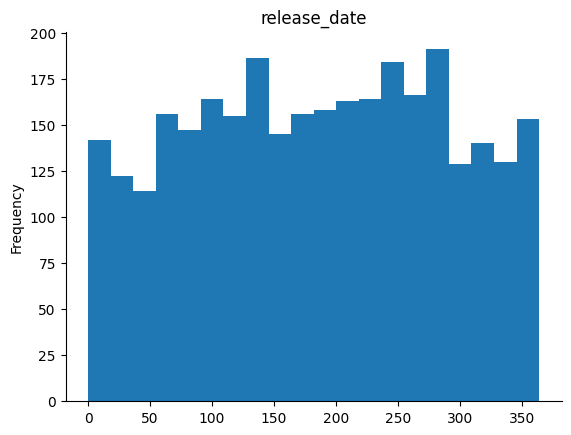

In [ ]:
from matplotlib import pyplot as plt
merged_df['release_date'].plot(kind='hist', bins=20, title='release_date')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Ordinal Encoding of distributor, director, main_actor_1, main_actor_2, main_actor_3, main_actor_4
# where the higher order (number) relates to the significance and occurance of the data value.
# Therefore, a higher number means that value is more significant and occurs that many times.

#display info for each column
print(merged_df['distributor'].value_counts(), "\n")
print(merged_df['director'].value_counts(), "\n")
print(merged_df['main_actor_1'].value_counts(), "\n")
print(merged_df['main_actor_2'].value_counts(), "\n")
print(merged_df['main_actor_3'].value_counts(), "\n")
print(merged_df['main_actor_4'].value_counts(), "\n")

# Distributors
d = merged_df['distributor'].value_counts().to_dict()
merged_df['distributor'] = merged_df['distributor'].map(d)

# Director
d = merged_df['director'].value_counts().to_dict()
merged_df['director'] = merged_df['director'].map(d)

# Main_actor_1
d = merged_df['main_actor_1'].value_counts().to_dict()
merged_df['main_actor_1'] = merged_df['main_actor_1'].map(d)

# Main_actor_2
d = merged_df['main_actor_2'].value_counts().to_dict()
merged_df['main_actor_2'] = merged_df['main_actor_2'].map(d)

# Main_actor_3
d = merged_df['main_actor_3'].value_counts().to_dict()
merged_df['main_actor_3'] = merged_df['main_actor_3'].map(d)

# Main_actor_4
d = merged_df['main_actor_4'].value_counts().to_dict()
merged_df['main_actor_4'] = merged_df['main_actor_4'].map(d)

#add to csv
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

distributor
Warner Bros.               378
Universal Pictures         326
Twentieth Century Fox      286
Sony Pictures Releasing    260
Paramount Pictures         241
                          ... 
Slugger Pictures             1
Indican Pictures             1
Cowboy Pictures              1
Variance Films               1
Clarius Entertainment        1
Name: count, Length: 162, dtype: int64 

director
Clint Eastwood      20
Steven Spielberg    18
Ridley Scott        15
Ron Howard          13
Michael Bay         13
                    ..
Tom Green            1
Dewey Nicks          1
Ole Bornedal         1
Josh Schwartz        1
Nathan Greno         1
Name: count, Length: 1422, dtype: int64 

main_actor_1
Adam Sandler         27
Johnny Depp          25
Tom Cruise           24
Nicolas Cage         24
Denzel Washington    23
                     ..
Liam Payne            1
Matt Passmore         1
Natalie Dormer        1
Tara Westwood         1
Alden Ehrenreich      1
Name: count, Length: 1196

<ipython-input-16-a86de9780f9e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['distributor'] = merged_df['distributor'].map(d)
<ipython-input-16-a86de9780f9e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['director'] = merged_df['director'].map(d)
<ipython-input-16-a86de9780f9e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

title    year  mpaa  \
1                                 My Date with Drew  2004.0     2   
4                                         Following  1998.0     4   
5                                            Primer  2004.0     3   
7                               Paranormal Activity  2007.0     4   
11                                          Slacker  1990.0     4   
...                                             ...     ...   ...   
3238  Star Wars: Episode IX - The Rise of Skywalker  2019.0     3   
3239                        Solo: A Star Wars Story  2018.0     3   
3240       Pirates of the Caribbean: At World's End  2007.0     3   
3241        Star Wars: Episode VIII - The Last Jedi  2017.0     3   
3242                              Avengers: Endgame  2019.0     3   

      release_date  distributor  director  main_actor_1  main_actor_2  \
1               49            3         2             1             9   
4               12            1        10             1             1   
5               94            6         1             1             1   
7              299          241         1             2             2   
11              53            1         7             1             1   
...            ...          ...       ...           ...           ...   
3238           206          223         6             1             1   
3239           272          223        13             1             6   
3240           260          223        10            25             2   
3241           146          223         3             2             2   
3242           276          223         4            12             6   

      main_actor_3  main_actor_4    budget    revenue  genre_1  genre_2  \
1                1           1.0  1.045252   0.664990        6        6   
4                1           1.0  1.045112   0.666069        5       16   
5                1           1.0  1.045111   0.663512        7       20   
7                1           1.0  1.044951   0.254377       14       16   
11               1           1.0  1.044484   0.657086        4        7   
...            ...           ...       ...        ...      ...      ...   
3238             1           1.0  3.810094   3.481955        0        1   
3239             2           1.0  3.898073   0.878599        0        1   
3240             4           2.0  5.485749   3.909801        0        1   
3241             1           1.0  4.792238   4.701094        0        1   
3242             8           2.0  5.240222  10.138672        0        1   

      genre_3  runtime  
1           6     90.0  
4          24     69.0  
5          24     77.0  
7          24     86.0  
11          4     97.0  
...       ...      ...  
3238        9    142.0  
3239       20    135.0  
3240        9    169.0  
3241        9    152.0  
3242        7    181.0  

[3065 rows x 16 columns]

### Outlier Detection

In [ ]:
# Z-score outlier detection

abs_z_scores = np.abs(merged_df[['budget', 'revenue']]) # Convert the z-scores to absolute values
filtered_entries = (abs_z_scores < 3).all(axis=1) # Select data points with a z-scores above or below 3
merged_df = merged_df[filtered_entries] # Filter the dataset
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

title    year  mpaa  release_date  \
1                               My Date with Drew  2004.0     2            49   
4                                       Following  1998.0     4            12   
5                                          Primer  2004.0     3            94   
7                             Paranormal Activity  2007.0     4           299   
11                                        Slacker  1990.0     4            53   
...                                           ...     ...   ...           ...   
3202                   X-Men: Days of Future Past  2014.0     3           248   
3205               Guardians of the Galaxy Vol. 2  2017.0     3           288   
3206  Fantastic Beasts: The Crimes of Grindelwald  2018.0     3           142   
3207                          X-Men: Dark Phoenix  2019.0     3            54   
3215                Transformers: The Last Knight  2017.0     3           246   

      distributor  director  main_actor_1  main_actor_2  main_actor_3  \
1               3         2             1             9             1   
4               1        10             1             1             1   
5               6         1             1             1             1   
7             241         1             2             2             1   
11              1         7             1             1             1   
...           ...       ...           ...           ...           ...   
3202          286         9             8             4             4   
3205          223         4             6             5             2   
3206          378         5             3             3             4   
3207          286         1             7             3             3   
3215          241        13            22             9             4   

      main_actor_4    budget   revenue  genre_1  genre_2  genre_3  runtime  
1              1.0  1.045252  0.664990        6        6        6     90.0  
4              1.0  1.045112  0.666069        5       16       24     69.0  
5              1.0  1.045111  0.663512        7       20       24     77.0  
7              1.0  1.044951  0.254377       14       16       24     86.0  
11             1.0  1.044484  0.657086        4        7        4     97.0  
...            ...       ...       ...      ...      ...      ...      ...  
3202           1.0  2.768130  2.445126        0        1       20    132.0  
3205           2.0  2.637697  2.812837        0        1        4    136.0  
3206           1.0  2.549886  1.908499        1        8        9    134.0  
3207           3.0  2.485902  0.308565        0        1       20    113.0  
3215           1.0  2.950750  1.772283        0        1       20    154.0  

[2968 rows x 16 columns]

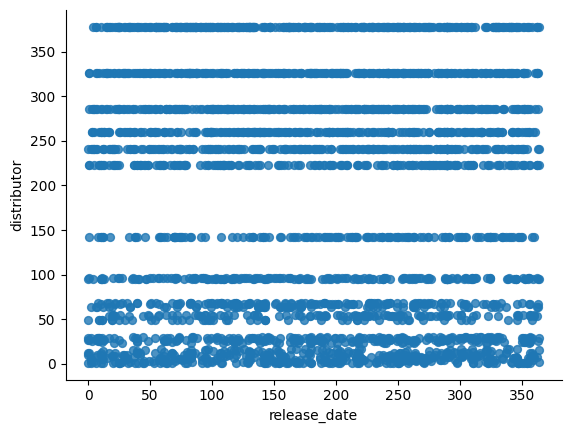

In [ ]:
# @title release_date vs distributor

from matplotlib import pyplot as plt
merged_df.plot(kind='scatter', x='release_date', y='distributor', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

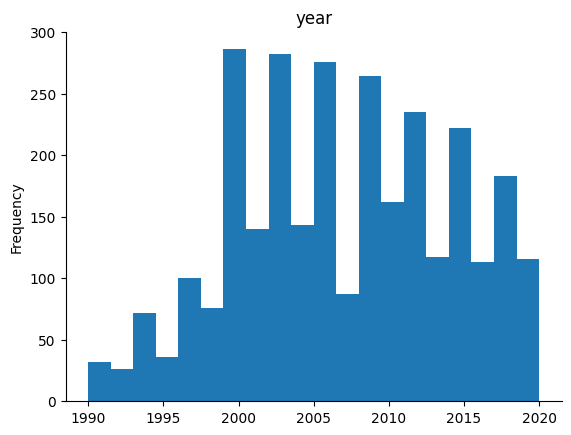

In [ ]:
# @title year

from matplotlib import pyplot as plt
merged_df['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Outlier detection if release date labels > 365

merged_df = merged_df[merged_df['release_date'] < 366]
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

title    year  mpaa  release_date  \
1                               My Date with Drew  2004.0     2            49   
4                                       Following  1998.0     4            12   
5                                          Primer  2004.0     3            94   
7                             Paranormal Activity  2007.0     4           299   
11                                        Slacker  1990.0     4            53   
...                                           ...     ...   ...           ...   
3202                   X-Men: Days of Future Past  2014.0     3           248   
3205               Guardians of the Galaxy Vol. 2  2017.0     3           288   
3206  Fantastic Beasts: The Crimes of Grindelwald  2018.0     3           142   
3207                          X-Men: Dark Phoenix  2019.0     3            54   
3215                Transformers: The Last Knight  2017.0     3           246   

      distributor  director  main_actor_1  main_actor_2  main_actor_3  \
1               3         2             1             9             1   
4               1        10             1             1             1   
5               6         1             1             1             1   
7             241         1             2             2             1   
11              1         7             1             1             1   
...           ...       ...           ...           ...           ...   
3202          286         9             8             4             4   
3205          223         4             6             5             2   
3206          378         5             3             3             4   
3207          286         1             7             3             3   
3215          241        13            22             9             4   

      main_actor_4    budget   revenue  genre_1  genre_2  genre_3  runtime  
1              1.0  1.045252  0.664990        6        6        6     90.0  
4              1.0  1.045112  0.666069        5       16       24     69.0  
5              1.0  1.045111  0.663512        7       20       24     77.0  
7              1.0  1.044951  0.254377       14       16       24     86.0  
11             1.0  1.044484  0.657086        4        7        4     97.0  
...            ...       ...       ...      ...      ...      ...      ...  
3202           1.0  2.768130  2.445126        0        1       20    132.0  
3205           2.0  2.637697  2.812837        0        1        4    136.0  
3206           1.0  2.549886  1.908499        1        8        9    134.0  
3207           3.0  2.485902  0.308565        0        1       20    113.0  
3215           1.0  2.950750  1.772283        0        1       20    154.0  

[2968 rows x 16 columns]

In [ ]:
# Normalize year and runtime with z-score normalization

merged_df[['year','runtime']] = stats.zscore(merged_df[['year','runtime']])
merged_df[['year','runtime']] = abs_z_scores = np.abs(merged_df[['year','runtime']]) # Convert the z-scores to absolute values
merged_df.to_csv("merged_clean.csv", index=False) #update the clean csv file
merged_df

#change of z-score by applying standard scaler. results better (f1, accuracy)?

title      year  mpaa  \
1                               My Date with Drew  0.400734     2   
4                                       Following  1.249685     4   
5                                          Primer  0.400734     3   
7                             Paranormal Activity  0.023741     4   
11                                        Slacker  2.381618     4   
...                                           ...       ...   ...   
3202                   X-Men: Days of Future Past  1.014183     3   
3205               Guardians of the Galaxy Vol. 2  1.438658     3   
3206  Fantastic Beasts: The Crimes of Grindelwald  1.580150     3   
3207                          X-Men: Dark Phoenix  1.721641     3   
3215                Transformers: The Last Knight  1.438658     3   

      release_date  distributor  director  main_actor_1  main_actor_2  \
1               49            3         2             1             9   
4               12            1        10             1             1   
5               94            6         1             1             1   
7              299          241         1             2             2   
11              53            1         7             1             1   
...            ...          ...       ...           ...           ...   
3202           248          286         9             8             4   
3205           288          223         4             6             5   
3206           142          378         5             3             3   
3207            54          286         1             7             3   
3215           246          241        13            22             9   

      main_actor_3  main_actor_4    budget   revenue  genre_1  genre_2  \
1                1           1.0  1.045252  0.664990        6        6   
4                1           1.0  1.045112  0.666069        5       16   
5                1           1.0  1.045111  0.663512        7       20   
7                1           1.0  1.044951  0.254377       14       16   
11               1           1.0  1.044484  0.657086        4        7   
...            ...           ...       ...       ...      ...      ...   
3202             4           1.0  2.768130  2.445126        0        1   
3205             2           2.0  2.637697  2.812837        0        1   
3206             4           1.0  2.549886  1.908499        1        8   
3207             3           3.0  2.485902  0.308565        0        1   
3215             4           1.0  2.950750  1.772283        0        1   

      genre_3   runtime  
1           6  1.043130  
4          24  2.229991  
5          24  1.777854  
7          24  1.269199  
11          4  0.647510  
...       ...       ...  
3202       20  1.330591  
3205        4  1.556660  
3206        9  1.443626  
3207       20  0.256765  
3215       20  2.573969  

[2968 rows x 16 columns]

# EDA

In [ ]:
# Revenue vs. director

import altair as alt

# Create a scatter plot with revenue on the y-axis and director on the x-axis
chart = alt.Chart(merged_df).mark_point().encode(
    x='director',
    y='revenue'
)

chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

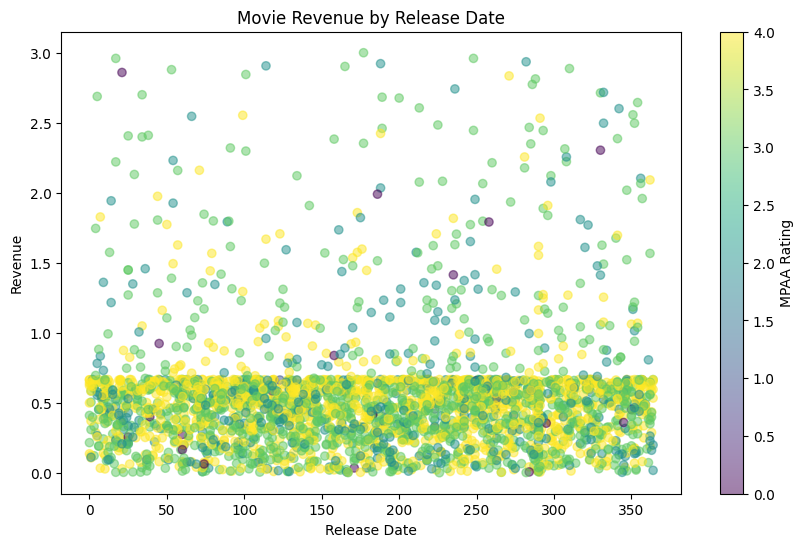

In [ ]:
# @title Movie Revenue by Release Date

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['release_date'], merged_df['revenue'], c=merged_df['mpaa'], alpha=0.5)
plt.title('Movie Revenue by Release Date')
plt.xlabel('Release Date')
plt.ylabel('Revenue')
_ = plt.colorbar(label='MPAA Rating')

In [ ]:
# Revenue vs. distributor

import altair as alt

# Create a scatter plot showing revenue vs. distributor
chart = alt.Chart(merged_df).mark_circle().encode(
    x='distributor',
    y='revenue'
)

chart

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

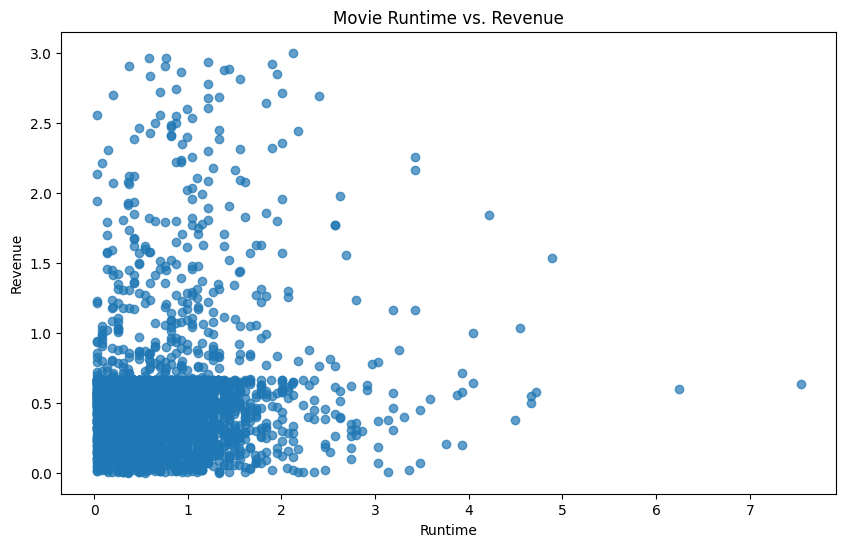

In [ ]:
# @title Movie Runtime vs. Revenue

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['runtime'], merged_df['revenue'], alpha=0.7)
plt.xlabel('Runtime')
plt.ylabel('Revenue')
_ = plt.title('Movie Runtime vs. Revenue')

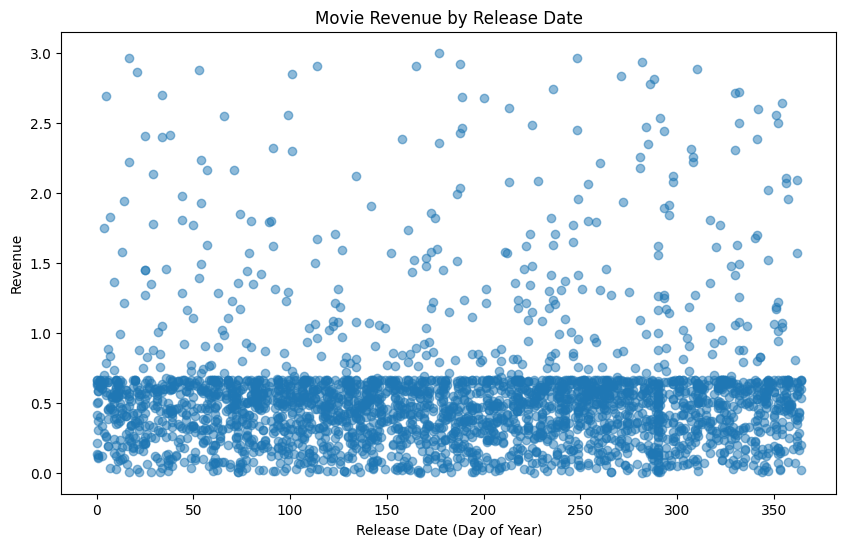

In [ ]:
# @title Movie Revenue by Release Date

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['release_date'], merged_df['revenue'], alpha=0.5)
plt.xlabel('Release Date (Day of Year)')
plt.ylabel('Revenue')
_ = plt.title('Movie Revenue by Release Date')

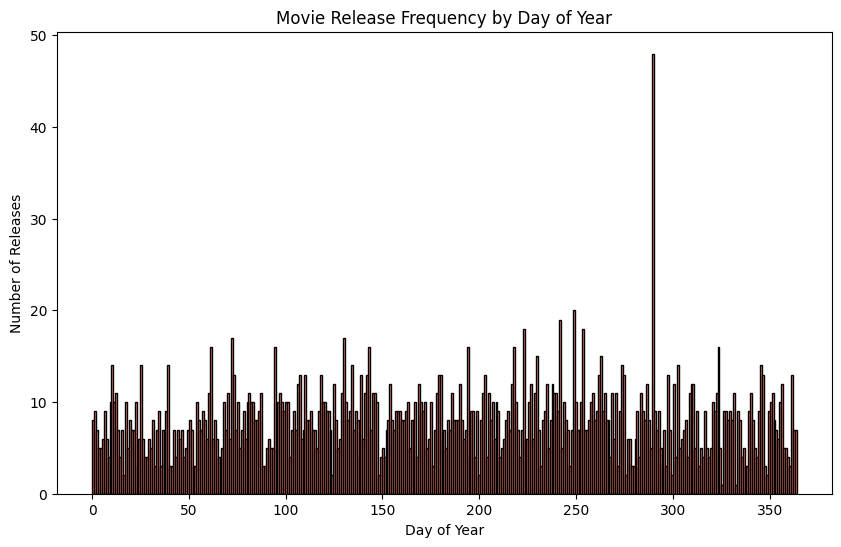

In [ ]:
# @title Movie Release Frequency by Day of Year

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(merged_df['release_date'], bins=365, color='salmon', edgecolor='black') # Using hist for frequency
plt.xlabel('Day of Year')
plt.ylabel('Number of Releases')
_ = plt.title('Movie Release Frequency by Day of Year')

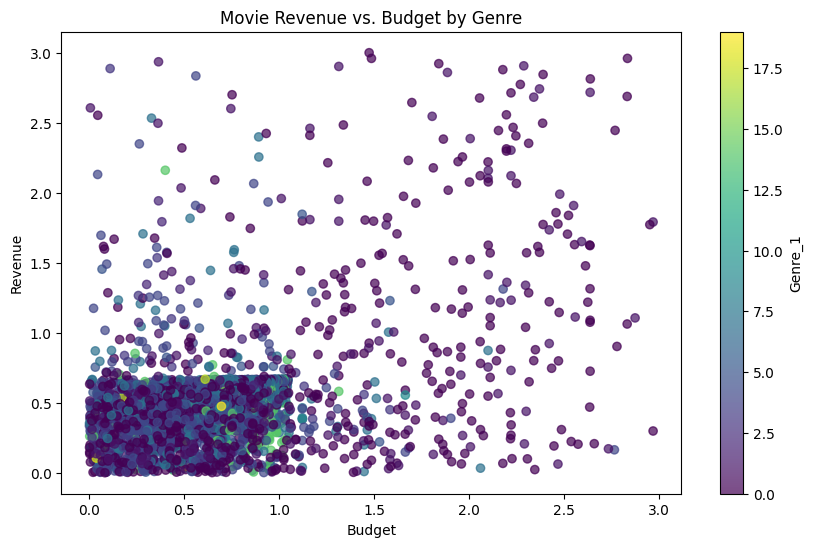

In [ ]:
# @title Movie Revenue vs. Budget by Genre

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'merged_df'
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['budget'], merged_df['revenue'], c=merged_df['genre_1'], cmap='viridis', alpha=0.7)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Movie Revenue vs. Budget by Genre')
_ = plt.colorbar(label='Genre_1')

In [ ]:
from matplotlib import pyplot as plt
merged_df['distributor'].plot(kind='hist', bins=20, title='distributor')
plt.gca().spines[['top', 'right',]].set_visible(False)

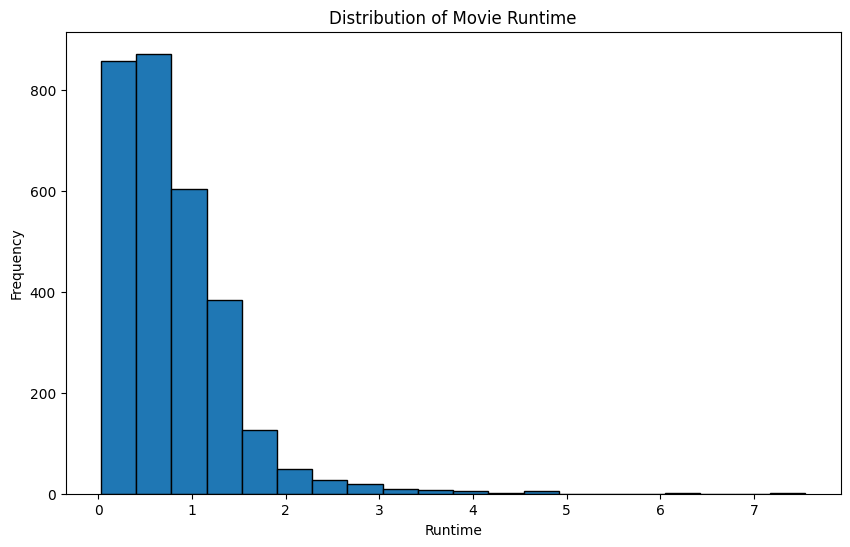

In [ ]:
# @title Distribution of Movie Runtime

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(merged_df['runtime'], bins=20, edgecolor='black')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime')
_ = plt.ylabel('Frequency')

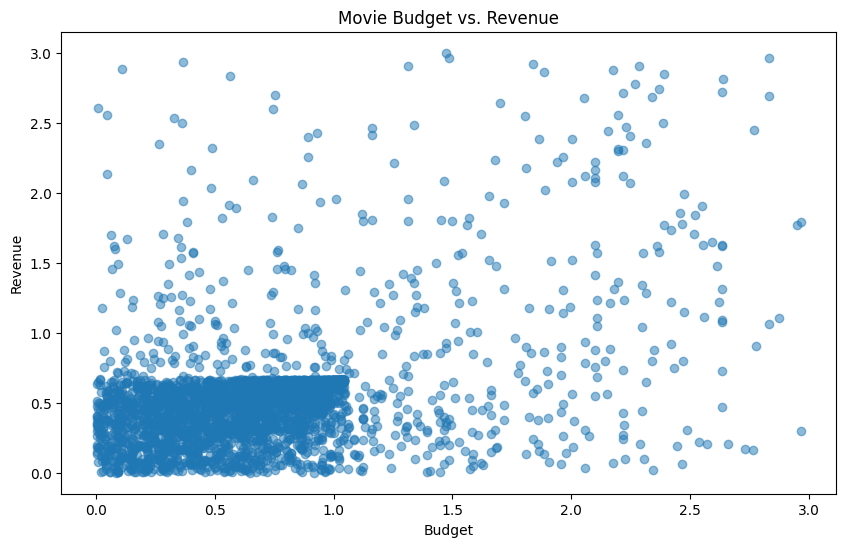

In [ ]:
# @title Movie Budget vs. Revenue

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['budget'], merged_df['revenue'], alpha=0.5)
plt.xlabel('Budget')
plt.ylabel('Revenue')
_ = plt.title('Movie Budget vs. Revenue')

# Train Model
1. random forest regressor

## Determine test and training sets

In [ ]:
# Drop movie title
x_train = merged_df.drop(columns=['title']) # x_train = merged_df.drop(columns=['title']) so you don't lose title in original dataset
x_train

year  mpaa  release_date  distributor  director  main_actor_1  \
1     0.400734     2            49            3         2             1   
4     1.249685     4            12            1        10             1   
5     0.400734     3            94            6         1             1   
7     0.023741     4           299          241         1             2   
11    2.381618     4            53            1         7             1   
...        ...   ...           ...          ...       ...           ...   
3202  1.014183     3           248          286         9             8   
3205  1.438658     3           288          223         4             6   
3206  1.580150     3           142          378         5             3   
3207  1.721641     3            54          286         1             7   
3215  1.438658     3           246          241        13            22   

      main_actor_2  main_actor_3  main_actor_4    budget   revenue  genre_1  \
1                9             1           1.0  1.045252  0.664990        6   
4                1             1           1.0  1.045112  0.666069        5   
5                1             1           1.0  1.045111  0.663512        7   
7                2             1           1.0  1.044951  0.254377       14   
11               1             1           1.0  1.044484  0.657086        4   
...            ...           ...           ...       ...       ...      ...   
3202             4             4           1.0  2.768130  2.445126        0   
3205             5             2           2.0  2.637697  2.812837        0   
3206             3             4           1.0  2.549886  1.908499        1   
3207             3             3           3.0  2.485902  0.308565        0   
3215             9             4           1.0  2.950750  1.772283        0   

      genre_2  genre_3   runtime  
1           6        6  1.043130  
4          16       24  2.229991  
5          20       24  1.777854  
7          16       24  1.269199  
11          7        4  0.647510  
...       ...      ...       ...  
3202        1       20  1.330591  
3205        1        4  1.556660  
3206        8        9  1.443626  
3207        1       20  0.256765  
3215        1       20  2.573969  

[2968 rows x 15 columns]

In [ ]:
# Drop target column 'revenue'
x_train = x_train.drop(columns=['revenue'])
y_train = merged_df['revenue']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=13)

## Train model on test and training sets

### 1. RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create random forest regressor
rfr = RandomForestRegressor(random_state=13)

In [ ]:
# Train the rfr
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=13)

In [ ]:
# Make predictions of y (revenue) based on the test set (dataset excluding revenue column)
y_pred = rfr.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
# mean_squared_error: determine erroneous predictions and model performance
mean_squared_error(y_pred, y_test) #we want the score as close to zero as possible

0.1218186724779278

In [ ]:
# mean_absolute_error: determine erroneous predictions and model performance
mean_absolute_error(y_pred, y_test) #we want the score as close to zero as possible

0.22369800986329563

In [ ]:
# r2_score: determine erroneous predictions and model performance
r2_score(y_pred, y_test) #we want the score as close to 1 as possible

-1.7785993419215962

### 2. H2O AutoML


In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=a42e1681257ae71fc761ff7fe932fd9a4d0e63efa0547dd28774120449a07b13
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()
h2o_data = h2o.H2OFrame(merged_df)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfbgq93kv
  JVM stdout: /tmp/tmpfbgq93kv/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfbgq93kv/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    17 days
H2O_cluster_name:           H2O_from_python_unknownUser_soecfj
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


NameError: name 'h20_data' is not defined

In [ ]:
h2o_data.describe()

Rows:2968
Cols:16

title                         year                  mpaa                release_date        distributor         director            main_actor_1        main_actor_2        main_actor_3        main_actor_4        budget                 revenue               genre_1             genre_2             genre_3             runtime
-------  ----------------------------  --------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ------------------  ---------------------  --------------------  ------------------  ------------------  ------------------  --------------------
type     string                        real                  int                 int                 int                 int                 int                 int                 int                 int                 real                   real                  int                 int                 int                 real
mins     NaN                           0.023740861174956475  0.0                 0.0                 1.0                 1.0                 1.0                 1.0                 1.0                 1.0                 0.0017931434020303004  0.000673429744860936  0.0                 0.0                 0.0                 0.025821192788271188
mean     NaN                           0.8478554535956017    3.2729110512129407  184.6610512129382   185.39925876010784  3.9986522911051243  6.930592991913748   3.3146900269541746  2.288746630727761   1.7896156439649384  0.700665936970316      0.5335004688829673    3.7304582210242625  8.774258760107825   11.643530997304596  0.7763257640760403
maxs     NaN                           2.3816183585899724    4.0                 364.0               378.0               20.0                27.0                14.0                11.0                7.0                 2.9681250747483694     2.99981320691148      19.0                26.0                26.0                7.547481333914507
sigma    NaN                           0.5303167787600368    0.7721435172488103  101.79707309564108  131.67700557766344  3.3775959749489513  6.5995705694249835  2.6426334973703645  1.7354085349285644  1.2068830370159331  0.4986247813556908     0.4261577739842945    3.6063628831040733  6.5242993822952915  7.60538488640494    0.6304381179029133
zeros    0                             0                     20                  8                   0                   0                   0                   0                   0                   0                   0                      0                     824                 2                   67                  0
missing  0                             0                     0                   0                   0                   0                   0                   0                   0                   2                   0                      0                     0                   0                   0                   0
0        My Date with Drew             0.4007342952541486    2.0                 49.0                3.0                 2.0                 1.0                 9.0                 1.0                 1.0                 1.0452516377351633     0.6649896986737133    6.0                 6.0                 6.0                 1.0431304874199878
1        Following                     1.2496846081123587    4.0                 12.0                1.0                 10.0                1.0                 1.0                 1.0                 1.0                 1.0451117686067373     0.6660694722997749    5.0                 16.0                24.0                2.2299913311569903
2        Primer                        0.4007342952541486    3.0                 94.0                6.0                 1.0                 1.0                 1.0                 1.0                 1.0                 1.0451106544621234     0.6635122625043208    7.0 

In [ ]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=['year', 'mpaa', 'release_date', 'distributor', 'director', 'main_actor_1', 'main_actor_2', 'main_actor_3', 'main_actor_4', 'budget', 'genre_1', 'genre_2', 'genre_3', 'runtime'], y='revenue', training_frame=h2o_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20241119_175554


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.028308459922166403
RMSE: 0.1682511810424117
MAE: 0.10753396272764676
RMSLE: 0.09435374126371712
Mean Residual Deviance: 0.028308459922166403
R^2: 0.8440728418156478
Null degrees of freedom: 2967
Residual degrees of freedom: 2962
Null deviance: 538.8381987290105
Residual deviance: 84.01950904898989
AIC: -2142.8975857588152

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13068167254346091
RMSE: 0.3614992013040429
MAE: 0.22524731059916017
RMSLE: 0.20065005050335585
Mean Residual Deviance: 0.13068167254346091
R^2: 0.28018613931998726
Null degrees of freedom: 2967
Residual degrees of freedom: 2962
Null deviance: 539.3507275446834
Residual deviance: 387.86320410899197
AIC: 2396.9661610178623

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     483.021   103.234    497.462       567.418       518.922       527.302       304.003
loglikelihood           0         0          0             0             0             0             0
mae                     0.224241  0.0154358  0.218643      0.240694      0.235921      0.224393      0.201556
mean_residual_deviance  0.129758  0.0184071  0.131413      0.143363      0.136022      0.140168      0.0978227
mse                     0.129758  0.0184071  0.131413      0.143363      0.136022      0.140168      0.0978227
null_deviance           107.87    21.6478    105.187       133.955       106.118       118.833       75.2569
r2                      0.276485  0.0439581  0.25181       0.33826       0.232186      0.305736      0.254434
residual_deviance       77.2698   12.8284    78.5848       88.598        81.4774       82.4188       55.2698
rmse                    0.359422  0.0267747  0.362509      0.378632      0.368812      0.37439       0.312766
rmsle                   0.199522  0.0104011  0.196382      0.208159      0.209663      0.199547      0.183856

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_BestOfFamily_1_AutoML_1_20241119_175554  0.361499  0.130682  0.225247  0.20065                   0.130682
DRF_1_AutoML_1_20241119_175554                           0.362216  0.1312    0.228019  0.202528                  0.1312
StackedEnsemble_AllModels_1_AutoML_1_20241119_175554     0.362936  0.131723  0.225662  0.201113                  0.131723
GBM_2_AutoML_1_20241119_175554                           0.366533  0.134347  0.228991  0.203783                  0.134347
XRT_1_AutoML_1_20241119_175554                           0.366999  0.134688  0.230542  0.204538                  0.134688
GBM_grid_1_AutoML_1_20241119_175554_model_2              0.367762  0.135249  0.228715  0.202809                  0.135249
GBM_3_AutoML_1_20241119_175554                           0.36802   0.135439  0.228481  0.203566                  0.135439
GBM_4_AutoML_1_20241119_175554                           0.368131  0.135521  0.228411  0.203363                  0.135521
GBM_1_AutoML_1_20241119_175554                           0.37091   0.137574  0.229964  0.204026                  0.137574
GBM_5_AutoML_1_20241119_175554                           0.374921  0.140565  0.235207  0.207507                  0.140565
GBM_grid_1_AutoML_1_20241119_175554_model_1              0.374948  0.140586  0.240447  0.209588                  0.140586
XGBoost_grid_1_AutoML_1_20241119_175554_model_2          0.379046  0.143676  0.238877  0.211946                  0.143676
DeepLearning_grid_1_AutoML_1_20241119_175554_model_1     0.379329  0.143891  0.228852  0.206746                  0.143891
XGBoost_grid_1_AutoML_1_20241119_175554_model_3          0.380421  0.14472   0.23817   0.213396                  0.14472
GLM_1_AutoML_1_20241119_175554                           0.38313   0.146788  0.240924  0.211694                  0.146788
DeepLearning_1_AutoML_1_20241119_175554                  0.386052  0.149036  0.239532  0.212169                  0.149036
XGBoost_3_AutoML_1_20241119_175554                       0.387075  0.149827  0.241773  0.214888                  0.149827
DeepLearning_grid_2_AutoML_1_20241119_175554_model_1     0.387931  0.15049   0.233871  0.210243                  0.15049
XGBoost_grid_1_AutoML_1_20241119_175554_model_1          0.38814   0.150652  0.248233  0.21764                   0.150652
DeepLearning_grid_3_AutoML_1_20241119_175554_model_1     0.393305  0.154689  0.230285  0.210023                  0.154689
XGBoost_2_AutoML_1_20241119_175554                       0.400218  0.160174  0.258185  0.225565                  0.160174
XGBoost_1_AutoML_1_20241119_175554                       0.404832  0.163889  0.263201  0.230004                  0.163889
[22 rows x 6 columns]

In [ ]:
aml.leader

Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20241119_175554


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.028308459922166403
RMSE: 0.1682511810424117
MAE: 0.10753396272764676
RMSLE: 0.09435374126371712
Mean Residual Deviance: 0.028308459922166403
R^2: 0.8440728418156478
Null degrees of freedom: 2967
Residual degrees of freedom: 2962
Null deviance: 538.8381987290105
Residual deviance: 84.01950904898989
AIC: -2142.8975857588152

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.13068167254346091
RMSE: 0.3614992013040429
MAE: 0.22524731059916017
RMSLE: 0.20065005050335585
Mean Residual Deviance: 0.13068167254346091
R^2: 0.28018613931998726
Null degrees of freedom: 2967
Residual degrees of freedom: 2962
Null deviance: 539.3507275446834
Residual deviance: 387.86320410899197
AIC: 2396.9661610178623

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     483.021   103.234    497.462       567.418       518.922       527.302       304.003
loglikelihood           0         0          0             0             0             0             0
mae                     0.224241  0.0154358  0.218643      0.240694      0.235921      0.224393      0.201556
mean_residual_deviance  0.129758  0.0184071  0.131413      0.143363      0.136022      0.140168      0.0978227
mse                     0.129758  0.0184071  0.131413      0.143363      0.136022      0.140168      0.0978227
null_deviance           107.87    21.6478    105.187       133.955       106.118       118.833       75.2569
r2                      0.276485  0.0439581  0.25181       0.33826       0.232186      0.305736      0.254434
residual_deviance       77.2698   12.8284    78.5848       88.598        81.4774       82.4188       55.2698
rmse                    0.359422  0.0267747  0.362509      0.378632      0.368812      0.37439       0.312766
rmsle                   0.199522  0.0104011  0.196382      0.208159      0.209663      0.199547      0.183856

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [ ]:
# Get model ids for all models in the AutoML Leaderboard
#model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model("DRF_1_AutoML_1_20241119_175554") #performance of all models
#se

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: DRF_1_AutoML_1_20241119_175554


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    38                 38                          799646                 20           20           20            1413          1786          1667.95

ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.1386537656876126
RMSE: 0.3723624117544796
MAE: 0.23652570283111365
RMSLE: 0.20929895636393708
Mean Residual Deviance: 0.1386537656876126

ModelMetricsRegression: drf
** Reported on cross-validation data. **

MSE: 0.1312004588193781
RMSE: 0.3622160388764944
MAE: 0.2280188073543652
RMSLE: 0.20252807915832616
Mean Residual Deviance: 0.1312004588193781

Cross-Validation Metrics Summary: 
                        mean      sd         cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  ---------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0          nan           nan           nan           nan           nan
loglikelihood           nan       0          nan           nan           nan           nan           nan
mae                     0.228103  0.0149136  0.233133      0.228387      0.210662      0.21857       0.249765
mean_residual_deviance  0.131631  0.0207899  0.139322      0.135805      0.105155      0.118386      0.159486
mse                     0.131631  0.0207899  0.139322      0.135805      0.105155      0.118386      0.159486
r2                      0.277164  0.0600776  0.217494      0.267441      0.320781      0.355425      0.224677
residual_deviance       0.131631  0.0207899  0.139322      0.135805      0.105155      0.118386      0.159486
rmse                    0.361897  0.0287628  0.373259      0.368517      0.324277      0.344073      0.399357
rmsle                   0.202465  0.0133082  0.213342      0.197684      0.188555      0.193271      0.219472

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-11-19 17:56:19  8.426 sec   0                  nan              nan             nan
    2024-11-19 17:56:19  8.581 sec   5                  0.456815         0.286155        0.20868
    2024-11-19 17:56:19  8.707 sec   10                 0.415713         0.265207        0.172817
    2024-11-19 17:56:19  8.823 sec   15                 0.402134         0.25534         0.161712
    2024-11-19 17:56:20  8.985 sec   20                 0.389802         0.247577        0.151946
    2024-11-19 17:56:20  9.130 sec   25                 0.38181          0.243793        0.145779
    2024-11-19 17:56:20  9.285 sec   30                 0.378919         0.241474        0.143579
    2024-11-19 17:56:20  9.459 sec   35                 0.375538         0.238812        0.141029
    2024-11-19 17:56:20  9.571 sec   38                 0.372362         0.236526        0.138654

Variable Importances: 
variable      relative_importance    scaled_importance    percentage
------------  ---------------------  -------------------  ------------
budget        3334.81                1                    0.250281
runtime       1043.5                 0.312911             0.0783159
year          1020.76                0.306093             0.0766094
main_actor_1  1012.98                0.303758             0.0760251
genre_2       980.771                0.294101             0.0736081
release_date  979.326                0.293668             0.0734996
director      866.704                0.259896            